In [1]:
import json
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as cx
import matplotlib.colors as mcolors
import numpy as np
from shapely.geometry import Polygon
from shapely.geometry import Point

plt.style.use('seaborn-whitegrid')
plt.rcParams["font.family"] = "sans serif"
plt.rcParams["figure.autolayout"] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.bottom'] = False

/Users/Tra_FIT/opt/anaconda3/lib/python3.8/site-packages/geopandas/_compat.py:112: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.
  warnings.warn(


#### 1. Average Travel Speed
Data is sourced from [DoT 2018 report](https://www1.nyc.gov/html/dot/downloads/pdf/mobility-report-2018-print.pdf).

In [2]:
cbd = [9.1,8.8,9.1,8.5,8.0,7.4,7.2,7.1] # 
mid = [6.4,6.1,6.5,5.9,5.5,5.1,5.0,5.0]
cbd_stacked = list(x - y for x , y in zip(cbd,mid))
year = list(range(2010,2018))


<ipython-input-3-43e63750091e>:14: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=None)


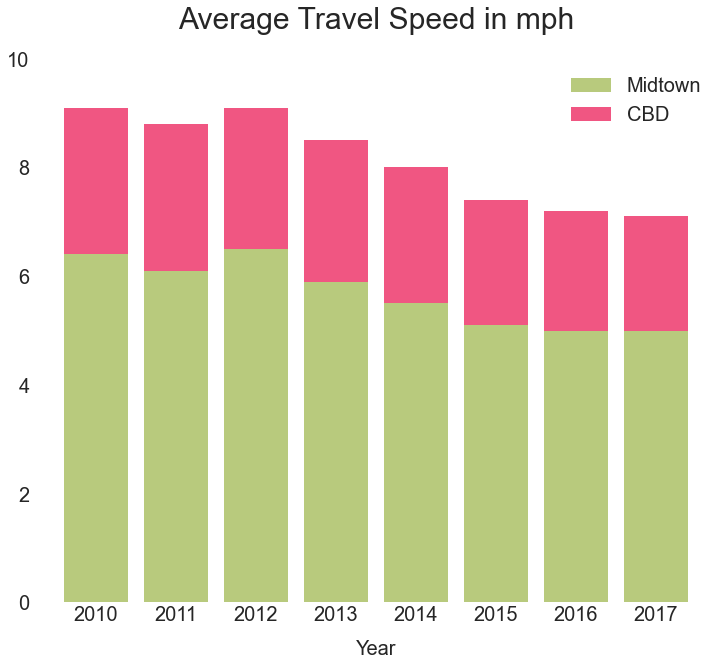

In [3]:
fig, ax = plt.subplots(figsize = (12.3,10))

ax.bar(year,mid, color ='#b8ca7d', label = 'Midtown',linewidth = 5)
ax.bar(year,cbd_stacked, color ='#f05682', label ='CBD',linewidth = 5,bottom = mid) 

#labels
ax.set_title('Average Travel Speed in mph',fontsize=30, pad = 30)
ax.set_xlabel('Year', labelpad = 15, fontsize = 20)


plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax.set_ylim(0,10)
plt.grid(b=None)
plt.legend(fontsize = 20)

plt.savefig('./avg_travel_speed[bar].png',dpi = 300,transparent = True)


#### 2. Congestion Zone

In [4]:
manhattan = gpd.read_file("Borough_Boundaries.geojson")
manhattan.to_crs('EPSG:4326', inplace = True)

# define congestion charge zone
congestion = manhattan.loc[[3],'geometry'].reset_index()
cut_1 = gpd.GeoSeries(Polygon([
                                (-73.993935, 40.773261 ),(-73.986484,40.915102),(-73.895155,40.883311),( -73.889859,40.780380),( -73.962395,40.748888),
                                (-73.958086, 40.758839 ),( -73.973184,40.765122)
                                ]),
                                crs = "EPSG:4326")

cut_2 = gpd.GeoSeries(Polygon([
                                (-74.054711,40.679019),( -73.995374, 40.677006), (-73.993724,40.707573),(-74.010026,40.697471),(-74.049678,40.705779)]), 
                                crs = "EPSG:4326")

cut_3 = gpd.GeoSeries(Polygon([
                                ( -73.967380,40.747266),(-73.957539,40.758202),(-73.935353,40.748994),(-73.962733,40.696485),
                                (-73.989409,40.705141), (-73.979068, 40.709413),(-73.973016,40.712176),(-73.969704,40.729944)
                                ]), 
                                crs = "EPSG:4326")

congestion = congestion.difference(cut_1)
congestion = congestion.difference(cut_2)
congestion = congestion.difference(cut_3)

congestion = congestion.to_crs("EPSG:3857")

data = [Point(-74.015671, 40.701423),Point(-73.999386,40.708019),Point(-73.991981,40.709659),Point(-73.975402, 40.714555),Point(-73.968071,40.747731), Point(-73.958886, 40.758808), Point(-74.002794, 40.760248),Point(-74.011605,40.726128)]
tunnel = gpd.GeoSeries(data, crs= "EPSG:4326")
tunnel = tunnel.to_crs("EPSG:3857")


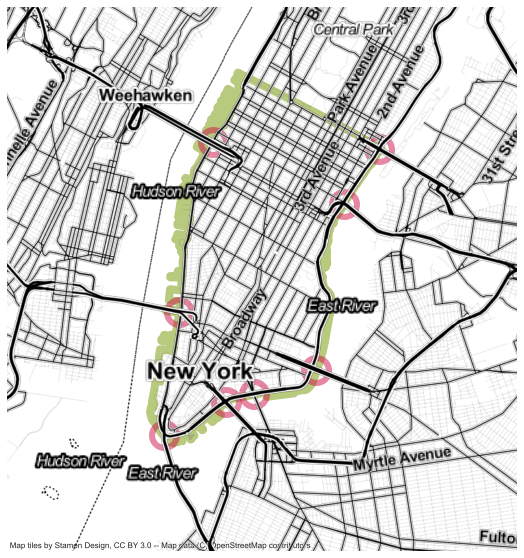

In [6]:
# template to plot the great paris map overlay
fig, ax = plt.subplots(figsize=(10,10 ))

#plot df 
congestion.plot(ax = ax, alpha = 1, color = "none", edgecolor = '#b8ca7d', linewidth = 8)
tunnel.plot(ax = ax, alpha = 0.5 , color = '#cf1248', linewidth = 25)

#Final touches
ax.set_axis_off()
ax.set_xlim(-8244000,-8229000)
ax.set_ylim(4965000,4981000)

#basemap
cx.add_basemap(ax, crs = "EPSG:3857", source = cx.providers.Stamen.TonerLines)
cx.add_basemap(ax, crs = "EPSG:3857", source = cx.providers.Stamen.TonerLabels, zoom = 12)



plt.show()
fig.savefig('./charge_zone.png',dpi = 300,transparent = True, bbox_inches = 'tight')

#### 3. London Congestion Zone

In [10]:
ldn = gpd.read_file("LonCongestion/LonCongestion.shp")
ldn.to_crs('EPSG:3857', inplace = True)

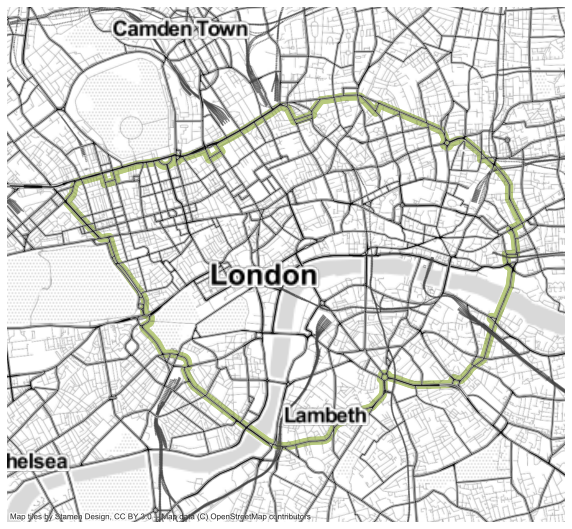

In [78]:
# template to plot the great paris map overlay
fig, ax = plt.subplots(figsize=(10,10 ))

#plot df 
ldn.plot(ax = ax, alpha = 1, color = "none", edgecolor = '#b8ca7d', linewidth = 8)

#Final touches
ax.set_axis_off()
ax.set_xlim(-20000,-7000)
ax.set_ylim(6706000,6718000)

#basemap
cx.add_basemap(ax, crs = "EPSG:3857", source = cx.providers.Stamen.TonerLines)
cx.add_basemap(ax, crs = "EPSG:3857", source = cx.providers.Stamen.TonerLite, zoom = 12)
cx.add_basemap(ax, crs = "EPSG:3857", source = cx.providers.Stamen.TonerLabels, zoom =12 )


plt.show()
fig.savefig('/Users/Tra_FIT/Desktop/HKU/ECON3232/project/ldn_cc.png',dpi = 300,transparent = True, bbox_inches = 'tight')



#### 4. Manhanttan

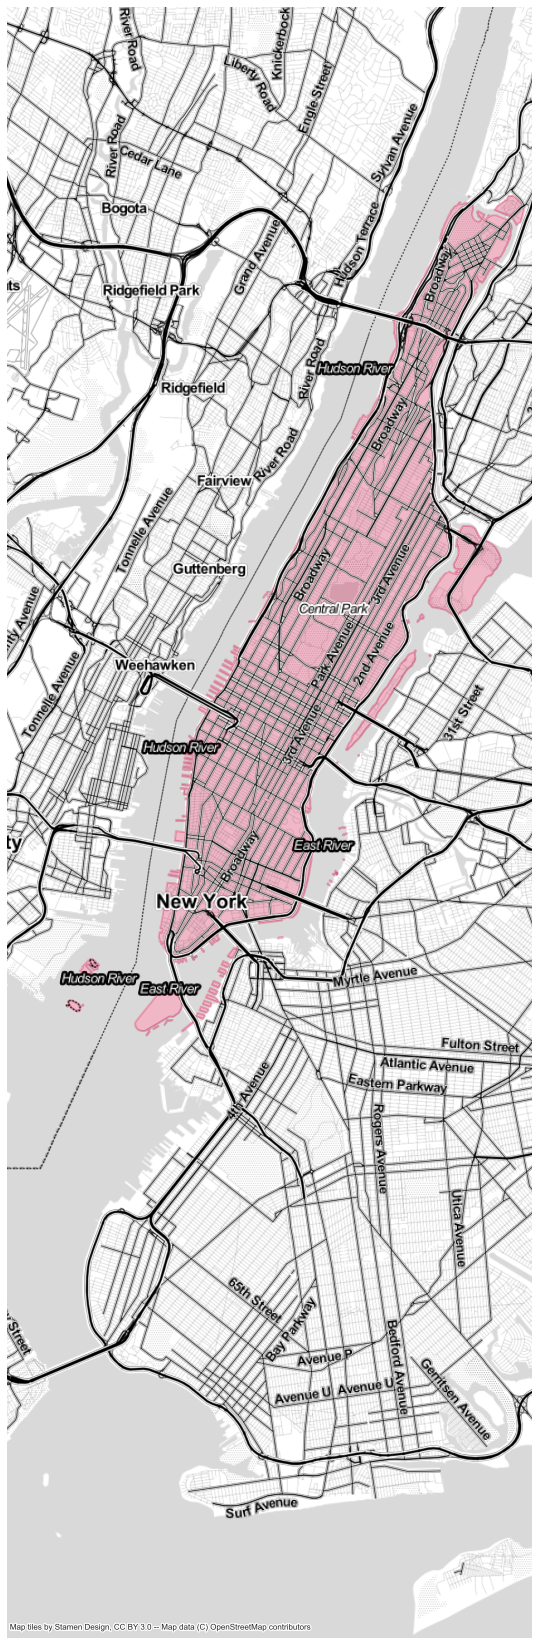

In [98]:
# template to plot the great paris map overlay
fig, ax = plt.subplots(figsize=(10,30 ))

#plot df 
man = manhattan.loc[[3],'geometry'].reset_index()
man = man.to_crs("EPSG:3857")
man.plot(ax = ax, alpha = 0.3, color = "#cf1248", edgecolor = '#cf1248', linewidth = 2)


#Final touches
ax.set_axis_off()
ax.set_xlim(-8245000,-8227000)
ax.set_ylim(4945000,5001000)

#basemap
cx.add_basemap(ax, crs = "EPSG:3857", source = cx.providers.Stamen.TonerLite, zoom =12)
cx.add_basemap(ax, crs = "EPSG:3857", source = cx.providers.Stamen.TonerLines)
cx.add_basemap(ax, crs = "EPSG:3857", source = cx.providers.Stamen.TonerLabels, zoom = 12)



plt.show()
fig.savefig('./nyc.png',dpi = 300,transparent = True, bbox_inches = 'tight')